In [6]:
from kernel import *
from utils import path
from svm import *
kernels_to_combine = [
    (KernelType.gaussian, {'gamma':0.1})
]

combined_kernel = KernelFunctionGenerator.combine(kernels_to_combine)

model = SVM(path)
model.set_kernel(combined_kernel)
model.fit_kernel(0.001)
print(model.kernel_accuracy())


(0.9624773960216998, 0.9555908009516257, 0.9780844155844156, 0.9428571428571428)


0.01 0.9271822704658526
0.05 0.9240162822252375
0.1 0.924468566259611
0.2 0.9185888738127544
0.5 0.9122568973315242
1 0.9072817729534147
2 0.8417005879692447
0.9235985533453888


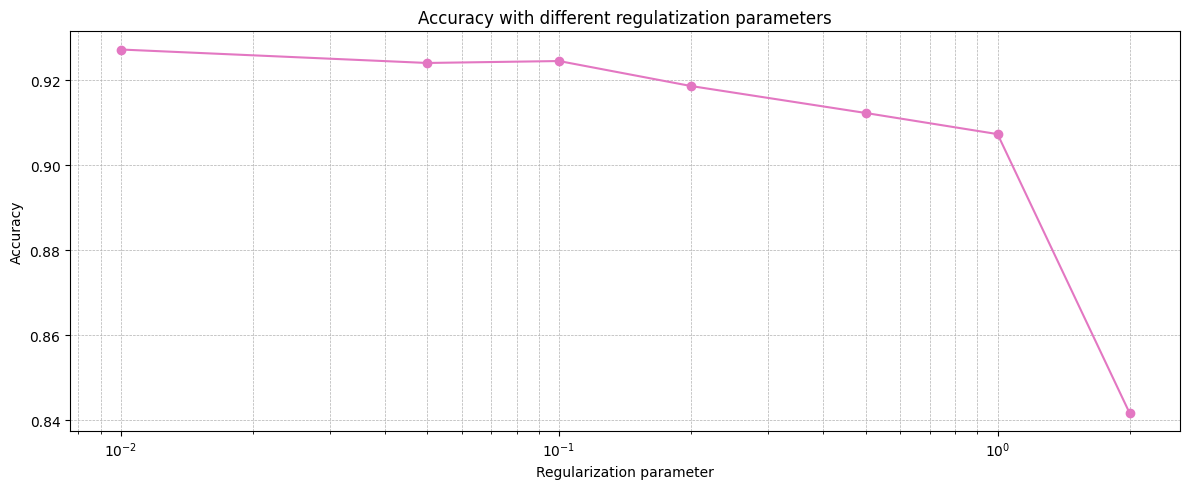

In [1]:
from kernel import *
from utils import path, plot_data
from svm import *
model = SVM(path)
model.estimate_regularization()
res = [x[0] for x in model.reg_res]
A = [x[1] for x in model.reg_res]
plot_data(res, A, "Accuracy with different regulatization parameters", "Regularization parameter", "Accuracy")

In [1]:
from kernel import *
from utils import path, plot_data
from svm import *

model = SVM(path)
model.fit()
epoch = [x[0] for x in model.lc]
accuracy = [x[1] for x in model.lc]
loss = [x[2] for x in model.lc]

KeyboardInterrupt: 

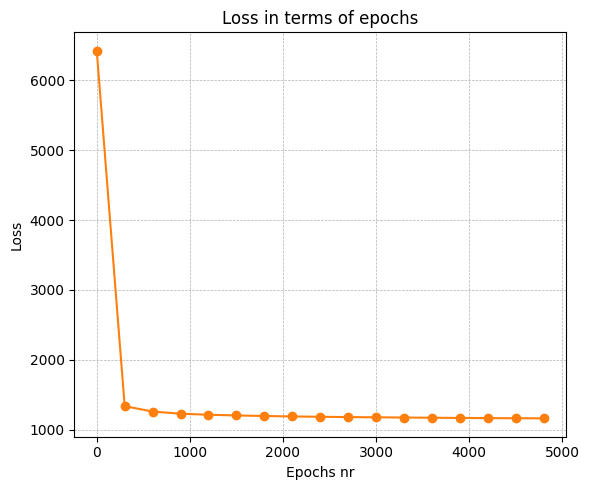

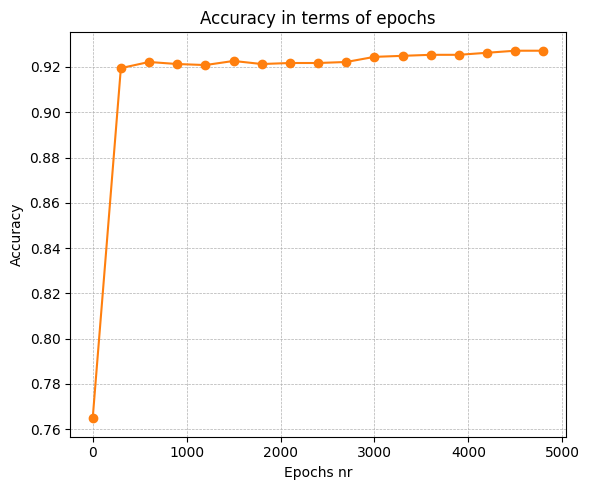

In [2]:

plot_data(epoch, loss, "Loss in terms of epochs", "Epochs nr", "Loss", False, (6, 5))
plot_data(epoch, accuracy, "Accuracy in terms of epochs", "Epochs nr", "Accuracy", False, (6, 5))

In [2]:
import numpy as np

from utils import path
from knn import KNN, DistanceFunctionGenerator, DistanceFunction
distance = DistanceFunctionGenerator.distance_function(DistanceFunction.Euclidean, 2)
model = KNN(path, distance_function=distance)
model.estimate_k()

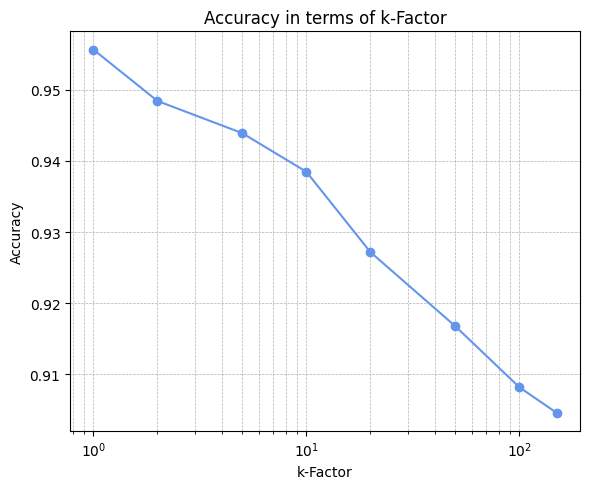

In [5]:
k = [x[0] for x in model.valid_test]
accuracy = [x[1] for x in model.valid_test]
plot_data(k, accuracy, "Accuracy in terms of k-Factor", "k-Factor", "Accuracy", True, (6, 5))

In [1]:
import numpy as np
from utils import path
from knn import KNN, DistanceFunctionGenerator, DistanceFunction

F = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
res = []

distance = DistanceFunctionGenerator.distance_function(DistanceFunction.Euclidean, 2)
for frac in F:
    results = []
    for i in range(3):
        import numpy as np
        model = KNN(path, distance_function=distance)
        model.select_fraction(frac)
        a, p, s, ss = model.check_accuracy()
        results.append(a)
    result = np.mean(results)
    res.append(result) 

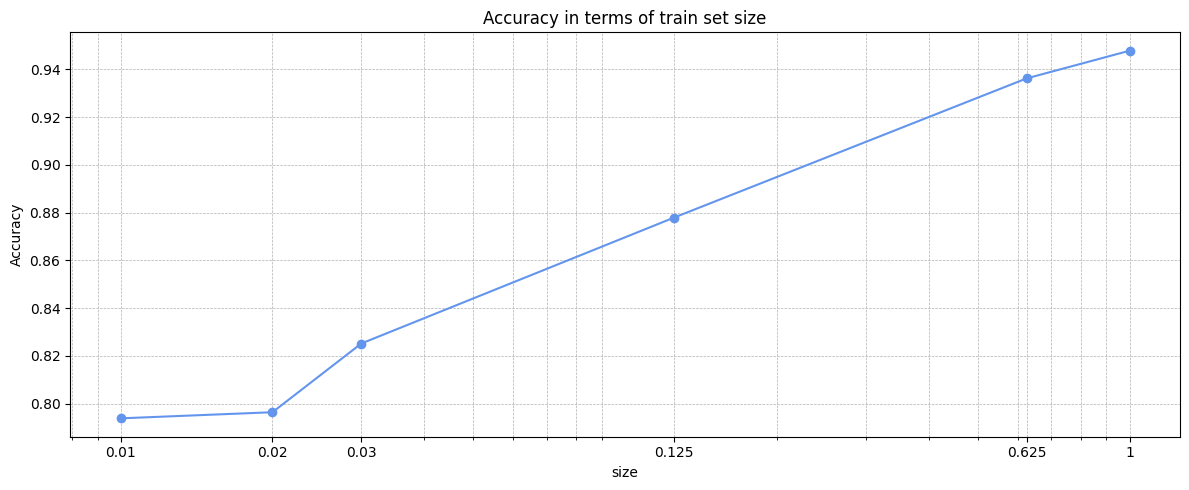

In [4]:
from utils import plot_data
plot_data(F, res, "Accuracy in terms of train set size", "size", "Accuracy", True, (12, 5), True)